# Analysis of MD data descriptions

## Prerequise packages

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

## Description length analysis

In [74]:
datasets = pd.read_parquet(
    "https://github.com/MDverse/data/blob/master/datasets.parquet?raw=true"
)
df = datasets.copy()
df.loc[:, "description_length"] = df["description"].str.len() + df["title"].str.len()
if df["description_length"].isnull().values.any():
    df = df.dropna(subset = ["description_length", "title"])
print("Number of description : ", df.shape[0])

Number of description :  1924


### Describe for each dataset

In [82]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
grouped = df.groupby(["dataset_origin"])["description_length"]
grouped.describe()

,count,mean,std,min,25%,50%,75%,max
dataset_origin,,,,,,,,
figshare,906,822,796,14,110,582,1486,7100
osf,22,309,265,56,140,195,405,1171
zenodo,996,806,809,30,383,600,932,11362


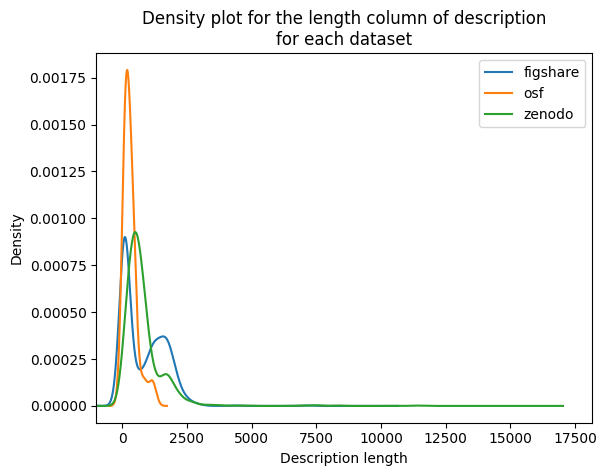

In [84]:
targets = grouped.groups.keys()
plt.title("Density plot for the length column of description\nfor each dataset")
for key in targets:
    x = grouped.get_group(key)
    x.plot.kde(label = key)
plt.xlim(-1000,)
plt.xlabel("Description length")
plt.legend(loc="upper right")
plt.show()

### All datasets

In [77]:
pd.DataFrame(df["description_length"].describe()).transpose()

,count,mean,std,min,25%,50%,75%,max
description_length,1924,808,800,14,176,592,1222,11362


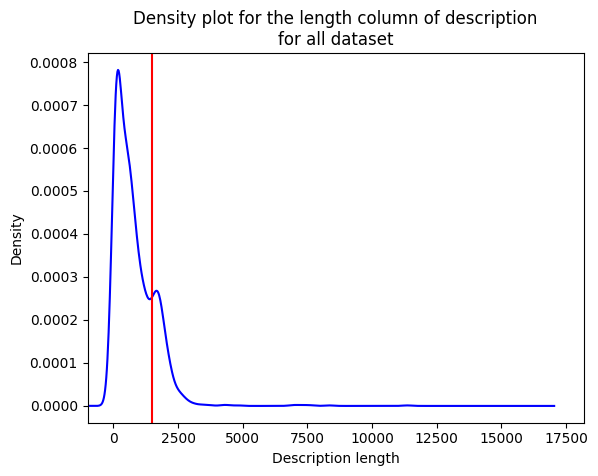

In [85]:
df["description_length"].plot.density(color="blue")
plt.title("Density plot for the length column of description\nfor all dataset")
plt.xlabel("Description length")
plt.axvline(x = 1500, color = "red", label = 'axvline - full height')
plt.xlim(-1000,)
plt.show()

The threshold was chosen empirically. It should be greater than 100 to make sure a large training data.

In [79]:
threshold = 1500
print("Selected threshold : ", threshold)
print("Number of description above the threshold : ", len(df[df["description_length"] > threshold]))

Selected threshold :  1500
Number of description above the threshold :  363


The threshold was chosen empirically. It should ensure that the number of descriptions is greater than 100 to make sure a large training data. Here, we have 363 descriptions with a threshold = 1500.

### Save data

In [72]:
to_save_data = df[df["description_length"] > threshold]
to_save_data[["dataset_origin", "title", "description", "description_length"]].to_csv(
    "../data/annotations_data.tsv",
    sep="\t",
    index=False,
)